/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
No handles with labels found to put in legend.


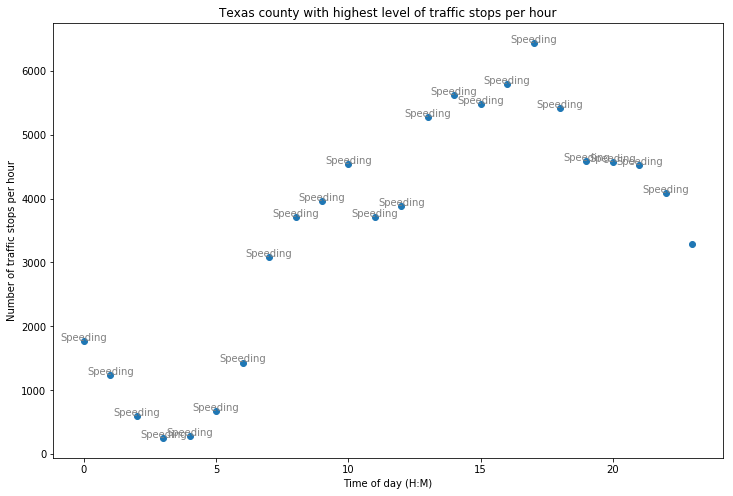

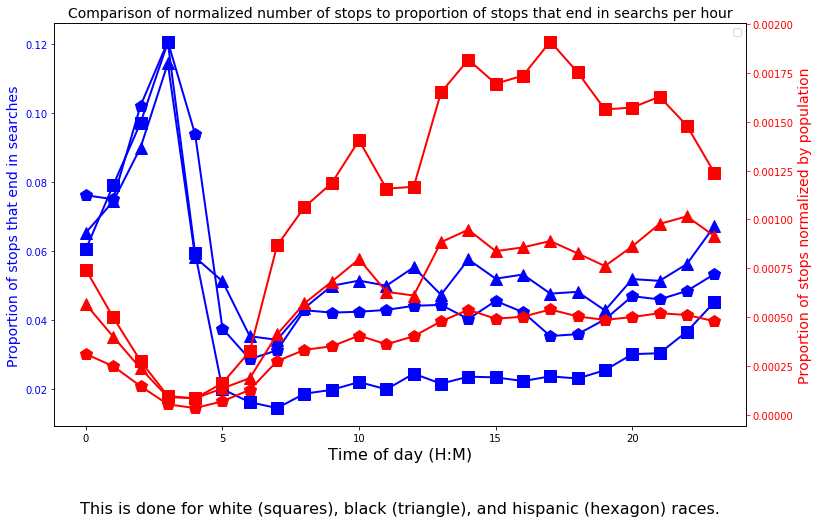

In [8]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime

tx = pd.read_csv('TX-clean.csv', nrows=500000)
#tx = pd.read_csv('TX-clean.csv')

times = tx['stop_time']
race = tx['driver_race']
search = tx['search_conducted']
loc = tx['violation']
outcome = tx['stop_outcome']

length =len(set(loc))

columns = list(map(str, range(0, 24)))
index = range(0,length)
df_new = pd.DataFrame(columns=columns, index=index)
df_new = df_new.fillna(0)
as_list = df_new.index.tolist()

city_max = list()
city_min = list()

city_max_name = list()
city_min_name = list()

white = np.zeros((24,2))
hispanic = np.zeros((24,2))
black = np.zeros((24,2))
other = np.zeros((24,2))
hours = np.arange(24)
ref1 = ['Walker']
ref2 = [0]
counter = 0

for x in range(1,len(times)):
    t1 = times[x]
    if (int(t1[0]) > 0):
        t2 = int(t1[:2])
    else:
        t2 = int(t1[1])

    if(race[x] == 'White'):
        white[t2,0] = white[t2,0] + 1
        if(search[x] == True):
            white[t2,1] = white[t2,1] + 1
    elif(race[x] == 'Black'):
        black[t2,0] = black[t2,0] + 1
        if(search[x] == True):
             black[t2,1] = black[t2,1] + 1
    elif(race[x] == 'Hispanic'):
        hispanic[t2,0] = hispanic[t2,0] + 1
        if(search[x] == True):
            hispanic[t2,1] = hispanic[t2,1] + 1
    else:
        other[t2,0] = other[t2,0] + 1
        if(search[x] == 'True'):
            other[t2,1] = other[t2,1] + 1
            
    str1 = loc[x]
    str2 = str1

    if ((str2 in as_list) and (outcome[x]=='Citation')):
        new_val = df_new.loc[str2,str(t2)] + 1
        df_new.set_value(str2,str(t2),new_val)
    elif (outcome[x]=='Citation'):
        as_list[counter] = str2
        df_new.index = as_list
        new_val = df_new.loc[str2,str(t2)] + 1
        df_new.set_value(str2,str(t2),new_val)
        counter = counter + 1

tot_pop = 29104064        
total = white[:,0]+black[:,0]+hispanic[:,0]+other[:,0]

white_prop = white[:,0]/(tot_pop*0.434)
black_prop = black[:,0]/(tot_pop*0.119)
hispanic_prop = hispanic[:,0]/(tot_pop*0.383)
other_prop = other[:,0]/(total*6.4)

white_prop_s =  white[:,1]/ white[:,0]
black_prop_s = black[:,1]/black[:,0]
hispanic_prop_s = hispanic[:,1]/hispanic[:,0]
other_prop_s = other[:,1]/other[:,0]


for x in range(0,24):
    city_max.append(df_new[str(x)].max())
    city_max_name.append(df_new[str(x)].argmax())

style = dict(size=10, color='grey')

fig, ax = plt.subplots()
ax.scatter(hours, city_max)
ax.set_xlabel('Time of day (H:M)')
ax.set_ylabel('Number of traffic stops per hour')
ax.set_title('Texas county with highest level of traffic stops per hour',fontsize=12)

for x in range(0,23):
    ax.text(hours[x],city_max[x]+5,city_max_name[x],ha='center',**style)
    
fig.set_size_inches(12, 8, forward=True)    

txt="This is done for white (squares), black (triangle), and hispanic (hexagon) races."
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))

ax1.plot(hours,white_prop_s, 'bs-', linewidth=2, markersize=12)
ax1.plot(hours,black_prop_s, 'b^-', linewidth=2, markersize=12)
ax1.plot(hours,hispanic_prop_s, 'bp-', linewidth=2, markersize=12)
ax1.set_xlabel('Time of day (H:M)', fontsize=16)
ax1.set_ylabel('Proportion of stops that end in searches', color='b', fontsize=14)
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(hours,white_prop, 'rs-', linewidth=2, markersize=12)
ax2.plot(hours,black_prop, 'r^-', linewidth=2, markersize=12)
ax2.plot(hours,hispanic_prop, 'rp-', linewidth=2, markersize=12)
ax2.set_ylabel('Proportion of stops normalized by population', color='r', fontsize=14)
ax2.tick_params('y', colors='r')
ax2.set_title('Comparison of normalized number of stops to proportion of stops that end in searchs per hour',fontsize=14)

fig.text(.5, .05, txt, ha='center', fontsize=16)

fig.set_size_inches(12, 8, forward=True)

fig.tight_layout()
plt.legend() 
plt.show()


